# MAD Straddle

Reference:
[*Moontower*](https://resources.moontower.ai/the-mad-straddle)

Mean Absolute deviation is similar to standard deviation, except it uses absolute value instead of squaring to make sure positive and negative deviations from a mean don't cancel. Also note that median absolute deviation is referred to as MAD.

$$\text{MAD} = \frac{1}{n} \sum_{i=1}^{n} |x_i - \bar{x}|$$
and
$$SD = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2}$$
Just divide by n-1 instead for the sample version.

For a gaussian distribution, $MAD = \sqrt{\frac{2}{\pi}} SD$ and $\sqrt{\frac{2}{\pi}} \approx 0.8$

So: $MAD = 0.8 SD$ and $SD = 1.25MAD$

Let's check this:

In [135]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [136]:
# Create a MAD function
def mad(data, sample=False):
    if not sample:
        return np.mean(np.abs(data - data.mean(0)))
    else:
        return np.sum(np.abs(data - data.mean(0))) / (len(data) - 1)

norm_sample = np.random.normal(size=10000)  # Get a sample from a standard normal distribution

print(mad(norm_sample))
print(norm_sample.std())

0.7921457533891593
0.9938597805837399


What if the distribution isn't normal? What can the ratio of SD to MAD tell us if it differs from 1.25?

Because of the squaring, SD gives more weight to outliers, so if the distribution is fat-tailed, we have more outliers and the ratio will be larger.  

For example, what about stock returns:

In [137]:
def get_returns(ticker='spy', start_date='2018-1-2', end_date='2019-12-31'):
    data_hold=yf.Ticker(ticker)
    return_df=data_hold.history(start=start_date,  end=end_date)
    return_df['Daily_Ret'] = return_df.Close.pct_change()  # Calculate daily returns
    return return_df

# plt.hist(spy_df.Daily_Ret, bins=40);
spy_df = get_returns('spy')
spy_df.Daily_Ret.std() / mad(spy_df.Daily_Ret, sample=True) 

1.4502263660377899

Here's a more extreme example: a bunch of zeros and one 100

In [140]:
fat_tail = np.zeros(10)
fat_tail[0] = 100

fat_tail.std(ddof=1) / mad(fat_tail, sample=True)

1.5811388300841895

Here's how the ratio increases as the number of zeros increase:

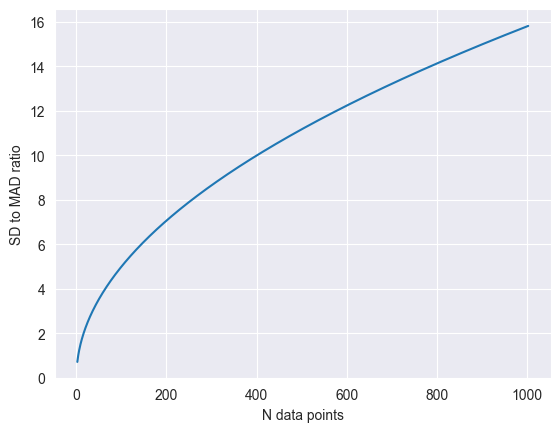

In [141]:
n = 1000
ratio = np.zeros([2,n])
for i in range(2,n+2):
    fat_tail = np.zeros(i)
    ratio[0,i-2] = i + 1
    fat_tail[0] = 100
    ratio[1,i-2] = fat_tail.std(ddof=1) / mad(fat_tail, sample=True)

plt.xlabel('N data points')
plt.ylabel('SD to MAD ratio')
plt.plot(ratio[0], ratio[1]);